# Week 6-7 한글 리뷰 데이터 전처리 Lab

1. 삼성 smartthings에 대한 한글 리뷰 파일을 열어서 review_df에 저장하시오.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir(r'C:\Users\Administrator\Downloads\6주차_11일차,12일차_자연어처리\Week6 자연어처리 Data')
review_df=pd.read_csv("smartthings_review.csv")
review_df['comment']

0        SmartThings 사용을 환영합니다 사용을 계속하려면 개인정보동의 등 화면에서 ...
1        그전엔 핸드폰과 티비(serif)와연결하면 바로 리모컨모드로 사용할 수 있었는데 업...
2        AI power manager 회사 3구 스위치 사용중입니다. 1년전부터 사용중인데...
3        갤럭시워치랑 스마트폰이 멀어져서 연결이 끊겼을때 워치에 분실알림 뜰수있는 기능 만들...
4        삼성 모니터 m7과 탭뷰 연결할려고만 하면 앱이 중단됩니다. 재설치 해도 마찬가지고...
                               ...                        
14640                                                   최고
14641                                                    굿
14642                                                멋져요^^
14643                                                 좋아요?
14644                                                   .굿
Name: comment, Length: 14645, dtype: object

In [8]:
import re

p=re.compile("[^가-힣ㄱ-ㅎㅏ-ㅣA-Za-z0-9_.,!?]+")

review_df['comment']=review_df['comment'].apply(lambda x: p.sub(" ",x))

In [9]:
review_df['comment']

0        SmartThings 사용을 환영합니다 사용을 계속하려면 개인정보동의 등 화면에서 ...
1        그전엔 핸드폰과 티비 serif 와연결하면 바로 리모컨모드로 사용할 수 있었는데 업...
2        AI power manager 회사 3구 스위치 사용중입니다. 1년전부터 사용중인데...
3        갤럭시워치랑 스마트폰이 멀어져서 연결이 끊겼을때 워치에 분실알림 뜰수있는 기능 만들...
4        삼성 모니터 m7과 탭뷰 연결할려고만 하면 앱이 중단됩니다. 재설치 해도 마찬가지고...
                               ...                        
14640                                                   최고
14641                                                    굿
14642                                                 멋져요 
14643                                                 좋아요?
14644                                                   .굿
Name: comment, Length: 14645, dtype: object

2. 문장 단위로 토콘화하시오.

In [10]:
import kss

review_df['comment_n']=review_df['comment'].apply(lambda x: kss.split_sentences(x,num_workers=1))

In [11]:
review_df['comment_n']

0        [SmartThings 사용을 환영합니다, 사용을 계속하려면 개인정보동의 등 화면에...
1        [그전엔 핸드폰과 티비 serif 와연결하면 바로 리모컨모드로 사용할 수 있었는데 ...
2        [AI power manager 회사 3구 스위치 사용중입니다., 1년전부터 사용중...
3        [갤럭시워치랑 스마트폰이 멀어져서 연결이 끊겼을때 워치에 분실알림, 뜰수있는 기능 ...
4        [삼성 모니터 m7과 탭뷰 연결할려고만 하면 앱이 중단됩니다., 재설치 해도 마찬가...
                               ...                        
14640                                                 [최고]
14641                                                  [굿]
14642                                                [멋져요]
14643                                               [좋아요?]
14644                                                 [.굿]
Name: comment_n, Length: 14645, dtype: object

3. 숫자, 문장부호, 특수문자를 제거하시오.

In [12]:
import re

def remove_num(sent_list):
    p=re.compile("[0-9]+")
    sent_n_remove=[]
    for sentence in sent_list:
        sent_n_remove.append(p.sub(" ", sentence))
    return(sent_n_remove)

review_df['comment_n']=review_df['comment_n'].apply(lambda x: remove_num(x))

In [13]:
review_df['comment_n']

0        [SmartThings 사용을 환영합니다, 사용을 계속하려면 개인정보동의 등 화면에...
1        [그전엔 핸드폰과 티비 serif 와연결하면 바로 리모컨모드로 사용할 수 있었는데 ...
2        [AI power manager 회사  구 스위치 사용중입니다.,  년전부터 사용중...
3        [갤럭시워치랑 스마트폰이 멀어져서 연결이 끊겼을때 워치에 분실알림, 뜰수있는 기능 ...
4        [삼성 모니터 m 과 탭뷰 연결할려고만 하면 앱이 중단됩니다., 재설치 해도 마찬가...
                               ...                        
14640                                                 [최고]
14641                                                  [굿]
14642                                                [멋져요]
14643                                               [좋아요?]
14644                                                 [.굿]
Name: comment_n, Length: 14645, dtype: object

In [14]:
def remove_punc(sent_list):
    p=re.compile("\W+")
    sent_n_remove=[]
    for sentence in sent_list:
        sent_n_remove.append(p.sub(" ", sentence))
    return(sent_n_remove)

review_df['comment_n']=review_df['comment_n'].apply(lambda x: remove_punc(x))

In [15]:
review_df['comment_n']

0        [SmartThings 사용을 환영합니다, 사용을 계속하려면 개인정보동의 등 화면에...
1        [그전엔 핸드폰과 티비 serif 와연결하면 바로 리모컨모드로 사용할 수 있었는데 ...
2        [AI power manager 회사 구 스위치 사용중입니다 ,  년전부터 사용중인...
3        [갤럭시워치랑 스마트폰이 멀어져서 연결이 끊겼을때 워치에 분실알림, 뜰수있는 기능 ...
4        [삼성 모니터 m 과 탭뷰 연결할려고만 하면 앱이 중단됩니다 , 재설치 해도 마찬가...
                               ...                        
14640                                                 [최고]
14641                                                  [굿]
14642                                                [멋져요]
14643                                               [좋아요 ]
14644                                                 [ 굿]
Name: comment_n, Length: 14645, dtype: object

4. (생략) 맞춤법 교정이 된 문장들로 대체하시오.

5. 명사, 동사, 형용사, 부사, 영어단어들을 추출하시오.

In [16]:
from konlpy.tag import Okt  
okt=Okt() 
def n_a_v_selection(sent_list): 
    sent_tokens=[]
    for sentence in sent_list:
        pos_result=okt.pos(sentence, stem=True)
        filtered_result=[pair[0] for pair in pos_result if (pair[1]=='Alpha')or(pair[1]=='Noun')or(pair[1]=='Verb')or(pair[1]=='Adjective') or(pair[1]=='Adverb')]
        sent_tokens.append(filtered_result)
    return sent_tokens

In [17]:
review_df['comment_n']=review_df['comment_n'].apply(lambda x: n_a_v_selection(x))

In [18]:
review_df['comment_n']

0        [[SmartThings, 사용, 환영, 하다], [사용, 계속, 하다, 개인정보,...
1        [[전, 핸드폰, 티비, serif, 오다, 연결하다, 바로, 리모컨, 모드, 사용...
2        [[AI, power, manager, 회사, 구, 스위치, 사용, 이다], [년전...
3        [[갤럭시, 워치, 스마트폰, 멀어지다, 연결, 끊기다, 때, 워치, 분실, 알림]...
4        [[삼성, 모니터, m, 과, 탭뷰, 연결하다, 하다, 앱, 중단, 되다], [재,...
                               ...                        
14640                                               [[최고]]
14641                                                [[굿]]
14642                                              [[멋지다]]
14643                                               [[좋다]]
14644                                                [[굿]]
Name: comment_n, Length: 14645, dtype: object

6. 불용어 처리를 하시오.

In [ ]:
import json

with open('korean_stopword.json',encoding='utf8') as f:
    stopwords = json.load(f)

stopwords.extend(['안','수','거','왜','것','후','에서','고','이다','는','한','안녕','형','형님','건','안','요','거','피','질','번','용','군','영','스','좀','데','듯','넉','테','런','하다','하나요','되다','안되다','있다','없다'])

In [20]:
def rem_n_stopwords(sent_list):
    sent_stop=[]
    for sentence in sent_list:
        new_sent=[]
        for token in sentence:
            if token not in stopwords:
                new_sent.append(token)
        sent_stop.append(new_sent)
    return(sent_stop)

review_df['comment_n']=review_df['comment_n'].apply(lambda x: rem_n_stopwords(x))

In [21]:
review_df['comment_n']

0        [[SmartThings, 사용, 환영], [사용, 계속, 개인정보, 동의, 화면,...
1        [[전, 핸드폰, 티비, serif, 오다, 연결하다, 리모컨, 모드, 사용, 업데...
2        [[AI, power, manager, 회사, 스위치, 사용], [년전, 사용, 약...
3        [[갤럭시, 워치, 스마트폰, 멀어지다, 연결, 끊기다, 워치, 분실, 알림], [...
4        [[삼성, 모니터, m, 탭뷰, 연결하다, 앱, 중단], [재, 설치, 해도, 마찬...
                               ...                        
14640                                               [[최고]]
14641                                                [[굿]]
14642                                              [[멋지다]]
14643                                               [[좋다]]
14644                                                [[굿]]
Name: comment_n, Length: 14645, dtype: object

7. 빈 리스트가 된 문장들을 제거하시오. 전처리된 파일은 smartthings_review_result.csv에 저장하시오.

In [22]:
def remove_empty_list(sent_list):
    removed_list = []
    for sentence in sent_list:
        if sentence: # sentence가 빈 경우가 아니면
            removed_list.append(sentence)    
    return removed_list

review_df['comment_n']=review_df['comment_n'].apply(lambda x: remove_empty_list(x))

review_df.to_csv('smartthings_review_result.csv',index=False, encoding='utf-8-sig')

In [23]:
review_df['comment_n']

0        [[SmartThings, 사용, 환영], [사용, 계속, 개인정보, 동의, 화면,...
1        [[전, 핸드폰, 티비, serif, 오다, 연결하다, 리모컨, 모드, 사용, 업데...
2        [[AI, power, manager, 회사, 스위치, 사용], [년전, 사용, 약...
3        [[갤럭시, 워치, 스마트폰, 멀어지다, 연결, 끊기다, 워치, 분실, 알림], [...
4        [[삼성, 모니터, m, 탭뷰, 연결하다, 앱, 중단], [재, 설치, 해도, 마찬...
                               ...                        
14640                                               [[최고]]
14641                                                [[굿]]
14642                                              [[멋지다]]
14643                                               [[좋다]]
14644                                                [[굿]]
Name: comment_n, Length: 14645, dtype: object

In [24]:
def one_word_list(sent_list):
    one_list=[]
    for sentence in sent_list:
        one_list.extend(sentence)
    return(one_list)

review_df['comment_n']=review_df['comment_n'].apply(lambda x: one_word_list(x))

In [25]:
review_df['comment_n']

0        [SmartThings, 사용, 환영, 사용, 계속, 개인정보, 동의, 화면, 동의...
1        [전, 핸드폰, 티비, serif, 오다, 연결하다, 리모컨, 모드, 사용, 업데이...
2        [AI, power, manager, 회사, 스위치, 사용, 년전, 사용, 약, 달...
3        [갤럭시, 워치, 스마트폰, 멀어지다, 연결, 끊기다, 워치, 분실, 알림, 뜨다,...
4        [삼성, 모니터, m, 탭뷰, 연결하다, 앱, 중단, 재, 설치, 해도, 마찬가지,...
                               ...                        
14640                                                 [최고]
14641                                                  [굿]
14642                                                [멋지다]
14643                                                 [좋다]
14644                                                  [굿]
Name: comment_n, Length: 14645, dtype: object

8. Top-15 단어 빈도 그래프를 그리시오.

In [26]:
total_word=[]
for i in range(len(review_df)):
    total_word.extend(review_df.loc[i,'comment_n'])

pd.Series(total_word).value_counts().head(15)

좋다      5258
사용      1986
편하다     1898
연결      1518
편리하다    1479
삼성      1205
앱       1189
너무      1106
굿       1019
에어컨     1007
자다       949
쓰다       771
기능       765
스마트      756
어플       736
dtype: int64

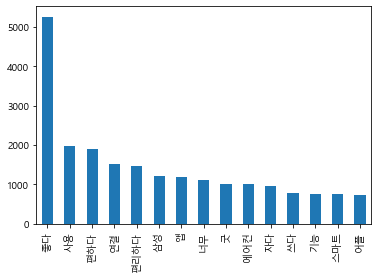

In [27]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

pd.Series(total_word).value_counts().head(15).plot(kind='bar')

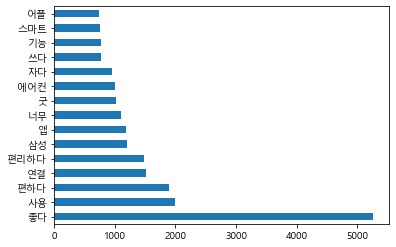

In [28]:
pd.Series(total_word).value_counts().head(15).plot(kind='barh')

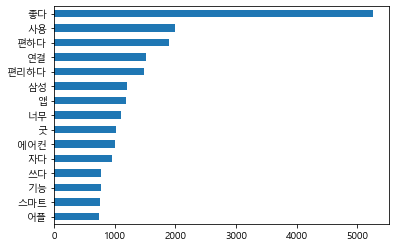

In [29]:
pd.Series(total_word).value_counts().head(15).plot(kind='barh').invert_yaxis()